# My Name: Mohamed Ahmed Tolba
# DataSet: Mediacl insurance data


# Import Libraries and Datasets

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.manifold import TSNE

from warnings import filterwarnings
filterwarnings('ignore')


## Read Data

In [59]:
df = pd.read_csv(r"C:\Users\Mohamed\Desktop\workshop2\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Pre-Processing

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Move the Target column to be the last one

In [61]:
columns = df.columns.tolist()
columns.append(columns.pop(columns.index("charges")))
df = df[columns]
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Check for Dtypes/Num_Unique/Null_values/Null_Ratio

In [62]:
pd.DataFrame({"Dtype": df.dtypes, "Num_Unique": df.nunique(), "Null_values": df.isnull().sum(),
              "Null_Ratio": df.isnull().sum() / df.shape[0]}).T

,age,sex,bmi,children,smoker,region,charges
Dtype,int64,object,float64,int64,object,object,float64
Num_Unique,47,2,548,6,2,4,1337
Null_values,0,0,0,0,0,0,0
Null_Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Change some columns to categorical

In [63]:
cols_to_change = ["sex", "children", "smoker", "region"]
df[cols_to_change] = df[cols_to_change].astype('category')

In [64]:
pd.DataFrame({"Dtype": df.dtypes}).T


,age,sex,bmi,children,smoker,region,charges
Dtype,int64,category,float64,category,category,category,float64


In [65]:
df.describe(include=["category"])

,sex,children,smoker,region
count,1338,1338,1338,1338
unique,2,6,2,4
top,male,0,no,southeast
freq,676,574,1064,364


## Check for Outliers

<AxesSubplot:xlabel='age'>

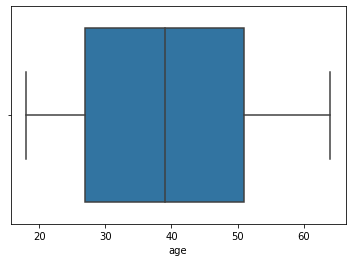

In [66]:
sns.boxplot(df["age"])

### No Outliers for age data 

<AxesSubplot:xlabel='bmi'>

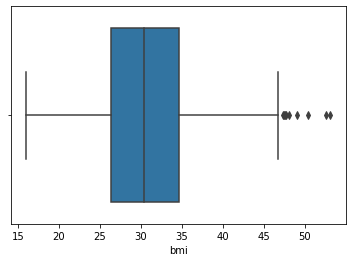

In [67]:
sns.boxplot(df["bmi"])

### Upper outliers for bmi data

In [68]:
Q1 = np.quantile(df["bmi"], .25)
Q3 = np.quantile(df["bmi"], .75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
upper

47.290000000000006

In [69]:
outliers = df[df.bmi>upper].bmi.values
df.bmi.replace(outliers,upper,inplace=True)
df.bmi.max()

47.290000000000006

## check after remove outliers

<AxesSubplot:xlabel='bmi'>

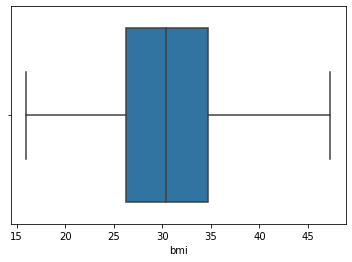

In [70]:
sns.boxplot(df["bmi"])

# Check for duplicates

In [71]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True,keep="first")

1


In [72]:
print(df.duplicated().sum())

0


# Get Stats about Data

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.650079,6.059192,15.9600,26.290,30.4000,34.70000,47.29000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


# Data Visualization

In [74]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## relationship between Two Numerical Data (charges , age)

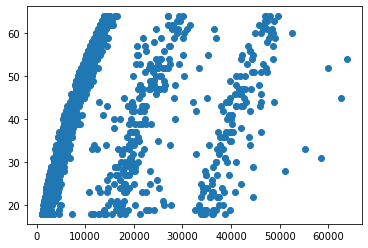

In [75]:
plt.scatter(df.charges , df.age )
plt.show()

In [76]:
corr1=np.corrcoef(df["age"] ,df["charges"])
corr1

array([[1.        , 0.29830821],
       [0.29830821, 1.        ]])

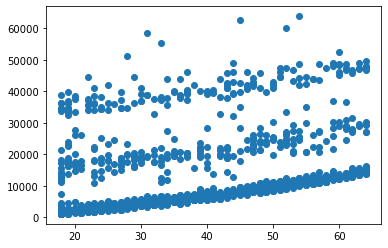

In [77]:
plt.scatter(df["age"] ,df["charges"])

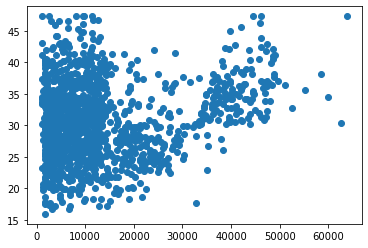

In [78]:
plt.scatter(df.charges , df.bmi)
plt.show()

In [79]:
corr2=np.corrcoef(df["bmi"] ,df["charges"])
corr2

array([[1.        , 0.19905868],
       [0.19905868, 1.        ]])

In [80]:
corr1**2

array([[1.        , 0.08898779],
       [0.08898779, 1.        ]])

In [81]:
corr2**2

array([[1.        , 0.03962436],
       [0.03962436, 1.        ]])

## relationship between all categorical data with Target(charges)

<function matplotlib.pyplot.show(close=None, block=None)>

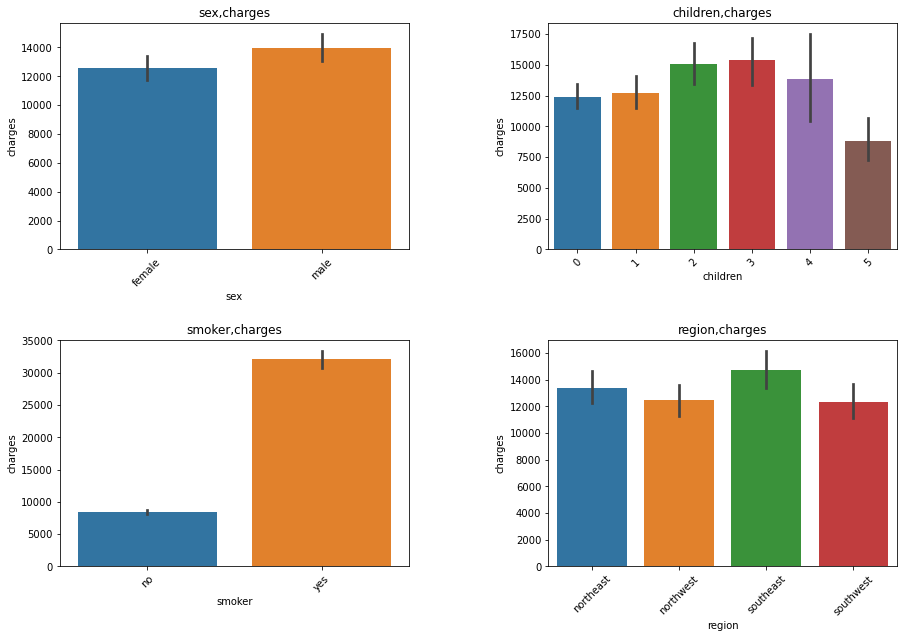

In [82]:
plt.figure(figsize=(15,10))
cols_to_change = ["sex", "children", "smoker", "region"]
for i , col in enumerate(cols_to_change):
    plt.subplot(2,2,i+1)
    sns.barplot(x=col, y="charges", data=df)
    plt.title(f"{col},charges")
    plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.4 , wspace= 0.4)    
plt.show

## Visualization for Two categorical data:

In [83]:
df.pivot_table( index="sex" , columns="smoker" , values="charges" , aggfunc=np.mean )

smoker,no,yes
sex,,
female,8762.297300,30678.996276
male,8099.700161,33042.005975


In [84]:
df.pivot_table( index="children" , columns="smoker" , values="charges" , aggfunc=np.mean )

smoker,no,yes
children,,
0,7624.833139,31341.363954
1,8303.109350,31822.654334
2,9493.093674,33844.235755
3,9614.519391,32724.915268
4,12121.344408,26532.276933
5,8183.845556,19023.260000


In [85]:
df.pivot_table( index="region" , columns="smoker" , values="charges" , aggfunc=np.mean )

smoker,no,yes
region,,
northeast,9165.531672,29673.536473
northwest,8582.467101,30192.003182
southeast,8032.216309,34844.996824
southwest,8019.284513,32269.063494


# split data

In [86]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [87]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Normilization

In [89]:
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
Col_to_Norm = ["age","bmi"]
X_scaler.fit(X_train[Col_to_Norm])
X_train[Col_to_Norm]=X_scaler.transform(X_train[Col_to_Norm])

X_val[Col_to_Norm]=X_scaler.transform(X_val[Col_to_Norm])

X_test[Col_to_Norm]=X_scaler.transform(X_test[Col_to_Norm])

In [90]:
y_train[["charges"]]=y_scaler.fit_transform(y_train[["charges"]])

y_val[["charges"]]=y_scaler.transform(y_val[["charges"]])

y_test[["charges"]]=y_scaler.transform(y_test[["charges"]])

In [91]:
X_train

,age,sex,bmi,children,smoker,region
1137,0.173913,female,0.177687,0,no,northwest
392,0.652174,male,0.480066,1,no,northeast
959,0.652174,male,0.651518,1,no,northwest
482,0.000000,female,0.476948,0,no,southeast
999,0.391304,female,0.330435,0,no,northwest
...,...,...,...,...,...,...
1108,0.173913,male,0.432650,1,no,southwest
125,0.173913,female,0.392781,0,no,northeast
766,0.630435,male,0.508121,1,no,southwest
252,0.782609,male,0.570796,2,yes,southeast


In [92]:
y_train

,charges
1137,0.033421
392,0.127575
959,0.444877
482,0.008139
999,0.067446
...,...
1108,0.028993
125,0.036823
766,0.112913
252,0.701776


# Encoding

In [93]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [94]:
pd.DataFrame(df.select_dtypes("category").nunique()).T

,sex,children,smoker,region
0,2,6,2,4


## Label encoding for sex and smoker columns

In [95]:
var_to_incod = ["sex" , "smoker"]
for c in var_to_incod:
    le = LabelEncoder()
    X_train[c] = le.fit_transform(X_train[c])
    X_test[c] = le.transform(X_test[c])
    X_val[c] = le.transform(X_val[c])

In [96]:
X_train

,age,sex,bmi,children,smoker,region
1137,0.173913,0,0.177687,0,0,northwest
392,0.652174,1,0.480066,1,0,northeast
959,0.652174,1,0.651518,1,0,northwest
482,0.000000,0,0.476948,0,0,southeast
999,0.391304,0,0.330435,0,0,northwest
...,...,...,...,...,...,...
1108,0.173913,1,0.432650,1,0,southwest
125,0.173913,0,0.392781,0,0,northeast
766,0.630435,1,0.508121,1,0,southwest
252,0.782609,1,0.570796,2,1,southeast


## One hot encoding for region column

In [97]:
X_train=pd.get_dummies(X_train, columns=["region"],drop_first=True)
X_train

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
1137,0.173913,0,0.177687,0,0,1,0,0
392,0.652174,1,0.480066,1,0,0,0,0
959,0.652174,1,0.651518,1,0,1,0,0
482,0.000000,0,0.476948,0,0,0,1,0
999,0.391304,0,0.330435,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1108,0.173913,1,0.432650,1,0,0,0,1
125,0.173913,0,0.392781,0,0,0,0,0
766,0.630435,1,0.508121,1,0,0,0,1
252,0.782609,1,0.570796,2,1,0,1,0


In [98]:
X_test=pd.get_dummies(X_test, columns=["region"],drop_first=True)

X_val=pd.get_dummies(X_val, columns=["region"],drop_first=True)

In [99]:
X_test

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
900,0.673913,1,0.187039,0,0,0,0,0
1064,0.239130,0,0.288269,4,0,0,0,1
1256,0.717391,0,0.642166,3,0,1,0,0
298,0.282609,1,0.576702,3,1,1,0,0
237,0.282609,1,0.707957,2,0,0,1,0
...,...,...,...,...,...,...,...,...
534,1.000000,1,0.776538,0,0,0,1,0
542,0.978261,0,0.639377,0,0,0,1,0
760,0.086957,0,0.582937,2,0,0,0,0
1284,0.934783,1,0.639377,1,1,0,0,1


# Bulids the Model

In [100]:
model=LinearRegression()
model.fit(X_train , y_train)


LinearRegression()

## Evaluations by using Mean Absolute Error

In [101]:
y_pred_train = model.predict(X_train)
y_pred_train_or = y_scaler.inverse_transform(y_pred_train)
y_train_or = y_scaler.inverse_transform(y_train)
print(mean_absolute_error(y_train_or, y_pred_train_or))
print(mean_absolute_percentage_error(y_train_or, y_pred_train_or))

4225.30797734899
0.42639694315075277


In [102]:
y_pred_val = model.predict(X_val)
y_pred_val_or = y_scaler.inverse_transform(y_pred_val)
y_val_or = y_scaler.inverse_transform(y_val)
print(mean_absolute_error(y_val_or, y_pred_val_or))
print(mean_absolute_percentage_error(y_val_or, y_pred_val_or))

3887.5023027864568
0.3573084834081921


In [103]:
df.describe()

,age,bmi,charges
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.650079,13279.121487
std,14.044333,6.059192,12110.359656
min,18.000000,15.960000,1121.873900
25%,27.000000,26.290000,4746.344000
50%,39.000000,30.400000,9386.161300
75%,51.000000,34.700000,16657.717450
max,64.000000,47.290000,63770.428010


### The problem with this model is underfitting
### solution>>> Polynomial regression

In [104]:
order=[2,3,4,5,6,7,8]
errs_train=[]
errs_val=[]
for i in order:
    
    poly = PolynomialFeatures(i)

    X_train_poly=poly.fit_transform(X_train)
    X_val_poly=poly.transform(X_val)
    
    model1=LinearRegression()
    model1.fit(X_train_poly , y_train)
    
    y_pred_train = model1.predict(X_train_poly)
    y_pred_train_or = y_scaler.inverse_transform(y_pred_train)
    y_train_or = y_scaler.inverse_transform(y_train)
    err_train=mean_absolute_error(y_train_or, y_pred_train_or)
    errs_train.append(err_train)
    
    y_pred_val = model1.predict(X_val_poly)
    y_pred_val_or = y_scaler.inverse_transform(y_pred_val)
    y_val_or = y_scaler.inverse_transform(y_val)
    err_val=mean_absolute_error(y_val_or, y_pred_val_or)
    errs_val.append(err_val)

In [105]:
print(errs_train)

print(errs_val)

[2834.1043673518557, 2731.45429608298, 2523.4362181732395, 1985.015292613687, 1330.752063238743, 654.7852920348661, 124.6461533993689]
[2873.599097559667, 3156.3345520282037, 4003.272076413448, 6599.68586296156, 194017.3671605285, 365844450.8085552, 44279128.53278745]


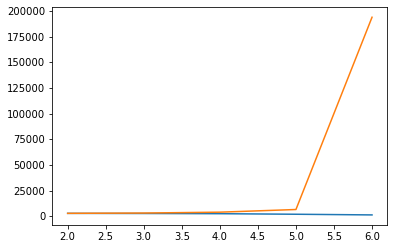

In [106]:
plt.plot(order[:-2],errs_train[:-2])
plt.plot(order[:-2],errs_val[:-2])
plt.show()

### I will select order number 8 with Overfiting problem

## apply linear regression with Ridge regularization

In [107]:
alpha=np.linspace(0.001,0.1,10)
errs_train=[]
errs_val=[]
for i in alpha:
    
    poly = PolynomialFeatures(2)

    X_train_poly=poly.fit_transform(X_train)
    X_val_poly=poly.transform(X_val)
    
    model2=Ridge(alpha=i)
    model2.fit(X_train_poly , y_train)
    
    y_pred_train = model2.predict(X_train_poly)
    y_pred_train_or = y_scaler.inverse_transform(y_pred_train)
    y_train_or = y_scaler.inverse_transform(y_train)
    err_train=mean_absolute_error(y_train_or, y_pred_train_or)
    errs_train.append(err_train)
    
    y_pred_val = model2.predict(X_val_poly)
    y_pred_val_or = y_scaler.inverse_transform(y_pred_val)
    y_val_or = y_scaler.inverse_transform(y_val)
    err_val=mean_absolute_error(y_val_or, y_pred_val_or)
    errs_val.append(err_val)

In [108]:
print(errs_train)

print(errs_val)

[2834.1055648967135, 2834.166528910096, 2834.23728893841, 2834.3114282830034, 2834.4216312661515, 2834.559228054097, 2834.6992259210333, 2834.842560845435, 2835.0372717832097, 2835.233580482587]
[2873.449630085294, 2871.8141059660816, 2870.1941153799926, 2868.5892889989586, 2866.9992732297733, 2865.4237292981375, 2863.862332397764, 2862.425750859727, 2861.187388217176, 2860.048362524671]


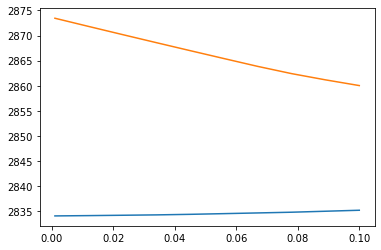

In [109]:
plt.plot(alpha[:],errs_train[:])
plt.plot(alpha[:],errs_val[:])
plt.show()

# Final Model

In [110]:
poly = PolynomialFeatures(2) #best model >> 2nd degree polynomail

X_train_poly=poly.fit_transform(X_train)
X_val_poly=poly.transform(X_val)
X_test_poly=poly.transform(X_test)

model1=LinearRegression()
model1.fit(X_train_poly , y_train)
    
y_pred_train = model1.predict(X_train_poly)
y_pred_train_or = y_scaler.inverse_transform(y_pred_train)
y_train_or = y_scaler.inverse_transform(y_train)
err_train=mean_absolute_error(y_train_or, y_pred_train_or)
print(err_train)
    
y_pred_val = model1.predict(X_val_poly)
y_pred_val_or = y_scaler.inverse_transform(y_pred_val)
y_val_or = y_scaler.inverse_transform(y_val)
err_val=mean_absolute_error(y_val_or, y_pred_val_or)
print(err_val)

y_pred_test = model1.predict(X_test_poly)
y_pred_test_or = y_scaler.inverse_transform(y_pred_test)
y_test_or = y_scaler.inverse_transform(y_test)
err_test=mean_absolute_error(y_test_or, y_pred_test_or)
print(err_test)

2834.1043673518557
2873.599097559667
2855.903685082983


# TSNE Model Visualization 

In [119]:
model = TSNE(n_components=1, random_state=0)
X_tr_tsne=model.fit_transform(X_train).flatten()

In [120]:
v_data=list(zip(X_tr_tsne, y_trian_or ,tr_pred ))

v_data=np.array(sorted(v_data,key=lambda x: x[0]))


X_tr_tsne, y_tr_srt, tr_pred_srt = v_data[:,0], v_data[:,1], v_data[:,2] 

NameError: name 'y_trian_or' is not defined

In [ ]:
plt.figure(figsize=(10,4))
plt.scatter(X_tr_tsne, y_tr_srt,c='b')
plt.plot(X_tr_tsne,tr_pred_srt,c='r')

plt.xlabel('t_SNE Dimension')
plt.ylabel('Target value (y)')
plt.legend(['Actual Data','Linear Regression Model'])

plt.title('Linear Regression Model Visualization ')

# I have a problem with the TSNE code.